# covid19_barPlotRace

This code to get the bar plot race of the COVID-19 data that I have been collecting. Have not added the ladakh and J&K's count, which I was doing for the previous codes, since for the purpose of the bar plot race only the top 5 counts will be required.

%matplotlib nbabb is required to have interactive matplotlib support at the backend.

Am removing the names of the second and the third file on a given same day. They create problem. Better not use them now.

In [19]:
%matplotlib nbagg   
import os
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

<IPython.core.display.Javascript object>


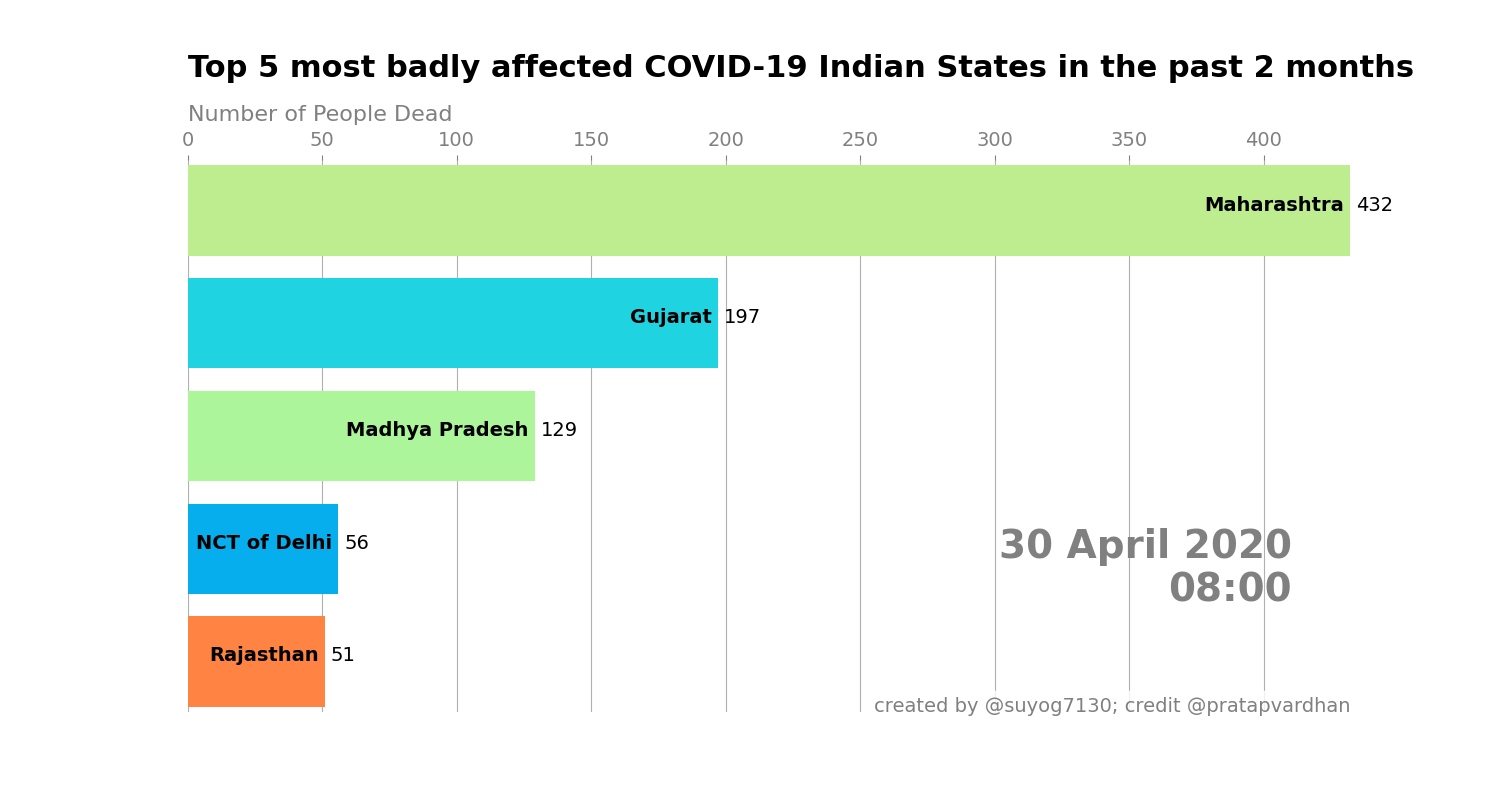

In [55]:
#-- function to get the large concatenated data file --#
def mergeFiles (times, dates, periods):
    
    global states
    
    dfArray = []
    for i in range(len(periods)):
        file_name = 'covid19Data_' + periods[i] + '.csv'
        df = pd.read_csv(file_name)
        df = df.set_index(df.columns[0])
    
        #-- renaming the states --# 
        df = df.replace({'AndamanNicobar':'Andaman & Nicobar Island', 'AndhraPradesh':'Andhra Pradesh',
                     'HimachalPradesh':'Himachal Pradesh', 'MP':'Madhya Pradesh',
                     'Delhi':'NCT of Delhi', 'Arunachal Pradesh':'Arunanchal Pradesh',
                     'UttarPradesh':'Uttar Pradesh', 'TamilNadu':'Tamil Nadu', 'Telengana':'Telangana'
                     })
        df['time'] = times[i]
        df['date'] = dates[i]
        dfArray.append(df)
        if i==0:
            states = df.State.to_list()
        
    dfMain = pd.concat(dfArray)
    
    return(dfMain)


#-- function to plot the bar plot --#
def barPlot(whatDate):
    
    date = dates[whatDate]  #--this can be automatically done when dates is supplied as the iterable.
    time = times[whatDate]
    
    #-- getting the part of the file 
    dfPlot = dfMain[dfMain.date==date].sort_values(by=which, ascending=True).tail(5)
    #dfPlot = dfPlot[::-1]  #--to flip the entries upside down.

    ax.clear()
    ax.barh(dfPlot.State, dfPlot.loc[:, which], color=[colours[i] for i in dfPlot.State])  #--bar plot drawn.
    
    #-- beautifying the plot 
    dx = dfPlot.loc[:, which].max()/200
    for y, (count, state) in enumerate(zip(dfPlot.loc[:, which], dfPlot.State)):
        ax.text(count-dx, y, state, ha='right', fontweight='bold', fontsize=14)
        ax.text(count+dx, y, count, ha='left', fontsize=14)
        
    ax.text(0.95, 0.20, date+'\n'+time, transform=ax.transAxes, fontsize=28, ha='right', color='gray', \
            fontweight='bold')
    
    if which=='Confirmed':
        heading = 'Number of Active cases'    
    elif which=='Dead':
        heading = 'Number of People ' + which
    else:
        heading = 'Number of patients ' + which
    ax.text(0, 1.07, heading, transform=ax.transAxes, fontsize=16, color='gray')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='gray', labelsize=14)
    
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)  #--to have gridlines at on the background.
    ax.set_yticks([])
    
    ax.text(0, 1.15, 'Top 5 most badly affected COVID-19 Indian States in the past 2 months', \
            transform=ax.transAxes, fontsize=22, fontweight='bold', ha='left')
    ax.text(1, 0, 'created by @suyog7130; credit @pratapvardhan', transform=ax.transAxes, color='gray', \
            fontsize=14, bbox=dict(facecolor='white', edgecolor='white', alpha=0.8), ha='right')
    plt.box(False)
    

if __name__=='__main__':
    
    global which, times, dates, colours
    
    df0 = pd.read_csv('dataFile_names.txt', sep='\n', header=None)
    df0.columns = ['file_name']
    fnames = df0.file_name.tolist()
    
    periods = [f[12:len(f)-4] for f in fnames]
    dates = [p[:-9].split(sep=', ')[0] for p in periods]
    times = [p[:-9].split(sep=', ')[1] for p in periods]
    for j, t in enumerate(times):
        if len(t)>5:
            times[j] = t[:5]
    #print(times); print(dates)
    
    dfMain = mergeFiles(times, dates, periods)
    #print(dfMain[dfMain.date=='25 April 2020'])
    
    #date, time = '04 June 2020', '08:00'
    which = 'Dead'

    colours = dict(zip(states, cm.rainbow(np.linspace(0, 1, len(states)))))  #--['lightcoral', 'gold', 'royalblue', 'aqua', 'limegreen']
    
    fig, ax = plt.subplots(figsize=(15, 8))
    #barPlot(dates[0], times[0], which, ax)
    #plt.tight_layout()
    plt.subplots_adjust(top=0.80)
    animator = animation.FuncAnimation(fig, barPlot, frames=len(dates), blit=False)
    #plt.show()
    HTML(animator.to_jshtml())
    #animator.to_html5_video()
    animator.save('covid19_barPlotRace_'+which+'.gif', writer='imagemagick', fps=3)
    
    WriterClass = animation.writers['ffmpeg']
    writer = WriterClass(fps=3, metadata=dict(artist='bww'), bitrate=1800)
    animator.save('covid19_barPlotRace_'+which+'.mp4', writer=writer)